# Импорт библиотек

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')




## Начало анализа

В этом датасете содержится комплексное исследование по поведению во время ежедневных поездок. Целью этого проекта является прогнозирование предпочтительного способа передвижения (например, автомобиль, велосипед, общественный транспорт) на основе личных и бытовых характеристик, включая местоположение рабочего места и дома.

In [141]:
df = pd.read_csv("Dataset_2_DATA.csv")
display(df)
print(df.iloc[0, :])

,HHID,PERSID,VPLID,RitID,HH_VALID,P_VALID,KHVM,WEGGEWEEST,VERTREKP,AANTVPL,...,HHAUTO_N,HHAUTO,HHBESTEL,HHHYBRID,HHMOTOR,HHBROM,HHSNOR,HHFIETS,HHVOUWFIETS,HHEBIKE
0,30055622,3005562201,13957101,1395710101,2,3,2,1,2,2,...,3,1,0,0,1,0,0,1,0,1
1,30055622,3005562201,13957102,1395710201,2,3,2,1,2,2,...,3,1,0,0,1,0,0,1,0,1
2,30055622,3005562201,13957201,1395720101,2,3,1,1,2,4,...,3,1,0,0,1,0,0,1,0,1
3,30055622,3005562201,13957202,1395720201,2,3,1,1,2,4,...,3,1,0,0,1,0,0,1,0,1
4,30204076,3020407601,14445303,1444530301,2,3,8,1,1,3,...,2,1,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7305,30862294,3086229401,19042304,1904230401,2,3,2,1,2,12,...,1,1,0,0,0,0,0,1,0,0
7306,30862294,3086229401,19042103,1904210301,2,3,7,1,2,5,...,1,1,0,0,0,0,0,1,0,0
7307,30862294,3086229401,19042104,1904210401,2,3,7,1,2,5,...,1,1,0,0,0,0,0,1,0,0
7308,30862294,3086229401,19042201,1904220101,2,3,1,1,2,3,...,1,1,0,0,0,0,0,1,0,0


HHID                         30055622
PERSID                     3005562201
VPLID                        13957101
RitID                      1395710101
HH_VALID                            2
P_VALID                             3
KHVM                                2
WEGGEWEEST                          1
VERTREKP                            2
AANTVPL                             2
VPLDAGNR                            1
VERPL                               3
VERPLNR                             1
TOER                                0
TOER_TYPE                           9
AANTRIT                             1
KMOTIEF                             2
VERTPROV                            0
AANKPROV                            0
KAFSTV                             13
KVERTTIJD                           8
KREISDUUR                          11
ROLAUTO                             2
PARKEERKOSTEN                       0
VERTRAGING                          0
DAGSOORT                            1
OORDEEL_AUTO

In [142]:
df = df.replace({' ': np.nan})
df = df.dropna()

df = df[df['KAFSTV'] >= 4] # по условию 7 варианта "Дополнительные условия:KAFSTV(Distance class trip) больше 3.5 км"
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4465 entries, 0 to 7309
Data columns (total 56 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   HHID                     4465 non-null   int64 
 1   PERSID                   4465 non-null   int64 
 2   VPLID                    4465 non-null   int64 
 3   RitID                    4465 non-null   int64 
 4   HH_VALID                 4465 non-null   int64 
 5   P_VALID                  4465 non-null   int64 
 6   KHVM                     4465 non-null   int64 
 7   WEGGEWEEST               4465 non-null   int64 
 8   VERTREKP                 4465 non-null   int64 
 9   AANTVPL                  4465 non-null   int64 
 10  VPLDAGNR                 4465 non-null   int64 
 11  VERPL                    4465 non-null   int64 
 12  VERPLNR                  4465 non-null   int64 
 13  TOER                     4465 non-null   int64 
 14  TOER_TYPE                4465 non-null   int6

None

In [143]:
desc = pd.read_csv('Dataset_2_DESCRIPTION.csv', encoding='latin1')
display(desc) 

,Variable,Var_description,Value,Label,Measurement_level,BaseData_Type,Name_BaseData,Filter_Variables
0,PERSOON,new person,0,no new person,Nominal,Mobility,MPNWAVE6_DAGBOEKdata,1
1,PERSOON,new person,1,new person,Nominal,Mobility,MPNWAVE6_DAGBOEKdata,1
2,HHID,Unique Household ID,999999999,Input,Scale,Mobility,MPNWAVE6_DAGBOEKdata,1
3,PERSID,Unique ID of Person,999999999,Unique ID of Person,Scale,Mobility,MPNWAVE6_DAGBOEKdata,1
4,HH_VALID,Complete household yes or no,0,"Not a complete household, not all persons comp...",Nominal,Mobility,MPNWAVE6_DAGBOEKdata,1
...,...,...,...,...,...,...,...,...
1054,tramhalte,Straight line distance between nearest tram st...,999999999,Straight line distance between nearest tram st...,Scale,Data_HouseHold,MPNWAVE6_HHdata_North-Holland,0
1055,bushalte4xpu,Straight line distance between nearest bus sto...,999999999,Straight line distance between nearest bus sto...,Scale,Data_HouseHold,MPNWAVE6_HHdata_North-Holland,0
1056,bushalte2xpu,Straight line distance between nearest bus sto...,999999999,Straight line distance between nearest bus sto...,Scale,Data_HouseHold,MPNWAVE6_HHdata_North-Holland,0
1057,bushalte1xpu,Straight line distance between nearest bus sto...,999999999,Straight line distance between nearest bus sto...,Scale,Data_HouseHold,MPNWAVE6_HHdata_North-Holland,0


Расшифровка и интепретация написанного

In [144]:
needed_description = pd.merge(desc, pd.DataFrame(df.columns), left_on='Variable', right_on=0)
display(needed_description)

,Variable,Var_description,Value,Label,Measurement_level,BaseData_Type,Name_BaseData,Filter_Variables,0
0,HHID,Unique Household ID,999999999,Input,Scale,Mobility,MPNWAVE6_DAGBOEKdata,1,HHID
1,PERSID,Unique ID of Person,999999999,Unique ID of Person,Scale,Mobility,MPNWAVE6_DAGBOEKdata,1,PERSID
2,HH_VALID,Complete household yes or no,0,"Not a complete household, not all persons comp...",Nominal,Mobility,MPNWAVE6_DAGBOEKdata,1,HH_VALID
3,HH_VALID,Complete household yes or no,1,"Not a complete household, but all persons comp...",Nominal,Mobility,MPNWAVE6_DAGBOEKdata,1,HH_VALID
4,HH_VALID,Complete household yes or no,2,Yes a complete household,Nominal,Mobility,MPNWAVE6_DAGBOEKdata,1,HH_VALID
...,...,...,...,...,...,...,...,...,...
303,HHEBIKE,"Yes or no electric bicycle, e-bike in the hous...",0,No,Nominal,Data_HouseHold,MPNWAVE6_HHdata_North-Holland,1,HHEBIKE
304,HHEBIKE,"Yes or no electric bicycle, e-bike in the hous...",1,Yes,Nominal,Data_HouseHold,MPNWAVE6_HHdata_North-Holland,1,HHEBIKE
305,HHEBIKE,"Yes or no electric bicycle, e-bike in the hous...",99,"no household questionnaire, no imputation from...",Nominal,Data_HouseHold,MPNWAVE6_HHdata_North-Holland,1,HHEBIKE
306,HHPERS,Number of people in the household,999999999,Number of people in the household,Nominal,Data_HouseHold,MPNWAVE6_HHdata_North-Holland,1,HHPERS


Создание понятных значений и ренейм столбцов для понимания

In [145]:
df_map = df.copy()

# Создаем словарь вида {колонка: {значение: метка}}
mapping = {}
for var in needed_description['Variable'].unique():
    subset = needed_description[needed_description['Variable'] == var]
    mapping[var] = dict(zip(subset['Value'], subset['Label']))

for column in df.columns:
    if column in mapping:
        # Конвертируем ключи маппинга в строки для совместимости с разными типами данных
        str_map = {str(k): v for k, v in mapping[column].items()}
        df_map[column] = df_map[column].astype(str).replace(str_map)

id_columns = ['HHID', 'PERSID', 'VPLID', 'RitID']
for col in id_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df_map[col], errors='coerce')

In [146]:
display(df_map.iloc[0, :])
print('-' * 100)
display(df.iloc[0, :])

HHID                                                                30055622
PERSID                                                            3005562201
VPLID                                                               13957101
RitID                                                             1395710101
HH_VALID                                            Yes a complete household
P_VALID                    person completed the questionnaire and complet...
KHVM                                                        Car as passenger
WEGGEWEEST                           On this day the person did go somewhere
VERTREKP                                                     Another address
AANTVPL                                                                    2
VPLDAGNR                                         first day of recorded trips
VERPL                                                            trip abroad
VERPLNR                                                                    1

----------------------------------------------------------------------------------------------------


HHID                         30055622
PERSID                     3005562201
VPLID                        13957101
RitID                      1395710101
HH_VALID                            2
P_VALID                             3
KHVM                                2
WEGGEWEEST                          1
VERTREKP                            2
AANTVPL                             2
VPLDAGNR                            1
VERPL                               3
VERPLNR                             1
TOER                                0
TOER_TYPE                           9
AANTRIT                             1
KMOTIEF                             2
VERTPROV                            0
AANKPROV                            0
KAFSTV                             13
KVERTTIJD                           8
KREISDUUR                          11
ROLAUTO                             2
PARKEERKOSTEN                       0
VERTRAGING                          0
DAGSOORT                            1
OORDEEL_AUTO

In [147]:
print(df.columns)

Index(['HHID', 'PERSID', 'VPLID', 'RitID', 'HH_VALID', 'P_VALID', 'KHVM',
       'WEGGEWEEST', 'VERTREKP', 'AANTVPL', 'VPLDAGNR', 'VERPL', 'VERPLNR',
       'TOER', 'TOER_TYPE', 'AANTRIT', 'KMOTIEF', 'VERTPROV', 'AANKPROV',
       'KAFSTV', 'KVERTTIJD', 'KREISDUUR', 'ROLAUTO', 'PARKEERKOSTEN',
       'VERTRAGING', 'DAGSOORT', 'OORDEEL_AUTO', 'OORDEEL_TREIN',
       'OORDEEL_BTM', 'OORDEEL_FIETS', 'OORDEEL_BROMMER', 'OORDEEL_LOPEN',
       'GEBRUIK_AUTO_STELLING3', 'GEBRUIK_AUTO_STELLING4',
       'GEBRUIK_TREIN_STELLING3', 'GEBRUIK_TREIN_STELLING4',
       'GEBRUIK_BTM_STELLING3', 'GEBRUIK_BTM_STELLING4',
       'GEBRUIK_FIETS_STELLING2', 'GEBRUIK_FIETS_STELLING3',
       'GEBRUIK_LOPEN_STELLING3', 'GEBRUIK_LOPEN_STELLING4', 'HHPERS', 'HHSAM',
       'N_KIND', 'HHBRUTOINK2_w5', 'HHAUTO_N', 'HHAUTO', 'HHBESTEL',
       'HHHYBRID', 'HHMOTOR', 'HHBROM', 'HHSNOR', 'HHFIETS', 'HHVOUWFIETS',
       'HHEBIKE'],
      dtype='object')



    # Базовые идентификаторы
    'HHID': 'id_домохозяйства',
    'PERSID': 'id_человека',
    'VPLID': 'id_поездки',
    'RitID': 'id_участка_поездки',
    
    # Валидация данных
    'HH_VALID': 'статус_валидации_домохозяйства',
    'P_VALID': 'статус_валидации_человека',
    
    # Характеристики поездок (основной фокус исследования)
    'KHVM': 'основной_транспорт',
    'WEGGEWEEST': 'факт_поездки_в_день',
    'VERTREKP': 'точка_отправления_первой_поездки',
    'AANTVPL': 'количество_поездок',
    'VPLDAGNR': 'номер_дня_поездки',
    'VERPL': 'тип_поездки',
    'VERPLNR': 'порядковый_номер_поездки',
    'TOER': 'флаг_круговой_поездки',
    'TOER_TYPE': 'тип_круговой_поездки',
    'AANTRIT': 'количество_сегментов_поездки',
    
    # Цели поездок
    'KMOTIEF': 'цель_поездки',
    
    # География
    'VERTPROV': 'провинция_отправления',
    'AANKPROV': 'провинция_прибытия',
    
    # Характеристики маршрута (важно для условия >3.5 км)
    'KAFSTV': 'класс_расстояния_поездки',
    'KVERTTIJD': 'класс_времени_отправления',
    'KREISDUUR': 'класс_длительности_поездки',
    
    # Использование автомобиля
    'ROLAUTO': 'роль_в_автомобиле',
    'PARKEERKOSTEN': 'класс_стоимости_парковки',
    'VERTRAGING': 'класс_задержки_поездки',
    
    # Временные характеристики
    'DAGSOORT': 'тип_дня',
    
    # Оценки видов транспорта (ключевой контекст)
    'OORDEEL_AUTO': 'оценка_автомобиля',
    'OORDEEL_TREIN': 'оценка_поезда',
    'OORDEEL_BTM': 'оценка_общественного_транспорта',
    'OORDEEL_FIETS': 'оценка_велосипеда',
    'OORDEEL_BROMMER': 'оценка_мопеда',
    'OORDEEL_LOPEN': 'оценка_передвижения_пешком',
    
    # Восприятие транспорта (важно для моделирования предпочтений)
    'GEBRUIK_AUTO_STELLING3': 'восприятие_экономии_времени_авто',
    'GEBRUIK_AUTO_STELLING4': 'восприятие_безопасности_авто',
    'GEBRUIK_TREIN_STELLING3': 'восприятие_экономии_времени_поезда',
    'GEBRUIK_TREIN_STELLING4': 'восприятие_безопасности_поезда',
    'GEBRUIK_BTM_STELLING3': 'восприятие_экономии_времени_общественного_транспорта',
    'GEBRUIK_BTM_STELLING4': 'восприятие_безопасности_общественного_транспорта',
    'GEBRUIK_FIETS_STELLING2': 'восприятие_релаксации_на_велосипеде',
    'GEBRUIK_FIETS_STELLING3': 'восприятие_экономии_времени_велосипеда',
    'GEBRUIK_LOPEN_STELLING3': 'восприятие_экономии_времени_ходьбы',
    'GEBRUIK_LOPEN_STELLING4': 'восприятие_безопасности_ходьбы',
    
    # Характеристики домохозяйства (ключевые предикторы)
    'HHPERS': 'количество_в_домохозяйстве',
    'HHSAM': 'состав_домохозяйства',
    'N_KIND': 'дети_до12_в_домохозяйстве',
    'HHBRUTOINK2_w5': 'класс_дохода_домохозяйства',
    'HHAUTO_N': 'количество_автомобилей',
    'HHAUTO': 'наличие_автомобиля',
    'HHBESTEL': 'наличие_фургона',
    'HHHYBRID': 'наличие_гибридного_авто',
    'HHMOTOR': 'наличие_мотоцикла',
    'HHBROM': 'наличие_мопеда',
    'HHSNOR': 'наличие_скутера',
    'HHFIETS': 'наличие_велосипеда',
    'HHVOUWFIETS': 'наличие_складного_велосипеда',
    'HHEBIKE': 'наличие_электровелосипеда'



# Таргет -- KHVM, задача классфикации, всего кклассов 7

## Анализ (EDA)

### График 1 (Целевая переменная (KHVM))

In [148]:
df2 = df_map.groupby('KHVM').size().reset_index().rename(columns = {'KHVM': 'Транспорт', 0: 'Количество поездок'}).sort_values('Количество поездок', ascending=False)
print(df2)

fig2 = px.bar(df2, x='Транспорт', y = 'Количество поездок', text_auto=True)
fig2.update_layout(title = {'text': 'Распределение количества использования конкретного транспортного средства', 'x': 0.5})
fig2.show()

          Транспорт  Количество поездок
2     Car as driver                1479
6             Train                 831
1    Bus/tram/metro                 729
0           Bicycle                 610
3  Car as passenger                 416
4             Other                 190
7           Walking                 128
5     Scooter/moped                  82


## График 2 (Основные характеристики поездок)

In [149]:
df1 = df_map.groupby(['KAFSTV', 'KHVM']).size().reset_index().rename(columns = {'KAFSTV': 'Расстояние поездки', 0: 'Количество поездок', 'KHVM': 'Транспортное средство'})
print(df1)

fig1 = px.bar(df1, 
              x='Расстояние поездки', 
              y = 'Количество поездок',
              color='Транспортное средство', 
              text_auto=True,
              width=1200,
              height=800)
fig1.update_layout(title = {'text': 'Распределение количества поездок по расстоянию и используемому виду транспорта', 'x': 0.5})
fig1.show()

   Расстояние поездки Транспортное средство  Количество поездок
0            10-15 km               Bicycle                  49
1            10-15 km        Bus/tram/metro                 127
2            10-15 km         Car as driver                 177
3            10-15 km      Car as passenger                  65
4            10-15 km                 Other                  19
..                ...                   ...                 ...
69             >50 km        Bus/tram/metro                  28
70             >50 km         Car as driver                 125
71             >50 km      Car as passenger                  63
72             >50 km                 Other                  48
73             >50 km                 Train                 351

[74 rows x 3 columns]


**вывод для графика** ----

### График 3 (Влияние оценки транспорта (OORDEEL_*) на предпочтение (KHVM))

'OORDEEL_AUTO': 'оценка_автомобиля',
'OORDEEL_TREIN': 'оценка_поезда',
'OORDEEL_BTM': 'оценка_общественного_транспорта',
'OORDEEL_FIETS': 'оценка_велосипеда',
'OORDEEL_BROMMER': 'оценка_мопеда',
'OORDEEL_LOPEN': 'оценка_передвижения_пешком',

In [169]:
df31 = df.groupby('OORDEEL_AUTO').size().reset_index().rename(columns = {'OORDEEL_AUTO': 'Оценка автомобиля', 0: 'Количество поездок'}).sort_values('Количество поездок', ascending=False)
df31['Тип передвижения'] = 'Автомобиль'


df32 = df.groupby('OORDEEL_TREIN').size().reset_index().rename(columns = {'OORDEEL_TREIN': 'Оценка поезда', 0: 'Количество поездок'}).sort_values('Количество поездок', ascending=False)
df32['Тип передвижения'] = 'Поезд'


df33 = df.groupby('OORDEEL_BTM').size().reset_index().rename(columns = {'OORDEEL_BTM': 'Оценка общественного транспорта', 0: 'Количество поездок'}).sort_values('Количество поездок', ascending=False)
df33['Тип передвижения'] = 'Общественный транспорт'


df34 = df.groupby('OORDEEL_FIETS').size().reset_index().rename(columns = {'OORDEEL_FIETS': 'Оценка велосипеда', 0: 'Количество поездок'}).sort_values('Количество поездок', ascending=False)
df34['Тип передвижения'] = 'Велосипед'


df35 = df.groupby('OORDEEL_BROMMER').size().reset_index().rename(columns = {'OORDEEL_BROMMER': 'Оценка мотоцикла', 0: 'Количество поездок'}).sort_values('Количество поездок', ascending=False)
df35['Тип передвижения'] = 'Мотоцикл'


df36 = df.groupby('OORDEEL_LOPEN').size().reset_index().rename(columns = {'OORDEEL_LOPEN': 'Оценка ходить пешком', 0: 'Количество поездок'}).sort_values('Количество поездок', ascending=False)
df36['Тип передвижения'] = 'Пешая прогулка'


df3 = pd.concat([df31, df32, df33, df34, df35, df36])

overall = sum(df31['Количество поездок'])



df_long = pd.melt(
    df3,
    id_vars=['Количество поездок', 'Тип передвижения'],
    value_vars=['Оценка автомобиля', 'Оценка поезда', 'Оценка общественного транспорта',
                'Оценка велосипеда', 'Оценка мотоцикла', 'Оценка ходить пешком'],
    var_name='Тип оценки',
    value_name='Оценка'
)


df_long.dropna(inplace=True)

df_long['Доля'] = round((df_long['Количество поездок'] / overall) * 100, 2)


df_long['Оценка'] = df_long['Оценка'].replace({1: 'Очень негативно',
                                   2: 'Негативно',
                                   3: 'Нейтрально',
                                   4: 'Позитивно',
                                   5: 'Очень позитивно',
                                   6: 'Нет оценки',
                                   })
order = ['Очень позитивно', 'Позитивно', 'Нейтрально', 'Очень негативно', 'Негативно', 'Нет оценки']
df_long['Оценка'] = pd.Categorical(df_long['Оценка'], categories=order, ordered=True)

df_long = df_long.rename(columns={'Количество поездок': 'Количество ответивших'})

#--------------ОТОБРАЗИМ ВСЕ В КОЛИЧЕСТВАХ----------------------

fig3 = px.bar(
    df_long, 
    x='Тип передвижения', 
    y='Количество ответивших', 
    text='Количество ответивших',
    facet_col='Оценка',
    facet_col_wrap=3,  # Создаем две строки по 3 графика
    height=600, 
    width=1400,
    category_orders={'Оценка': order}
)

fig3.update_traces(textfont_size=10, textposition='outside', cliponaxis=False)

fig3.update_layout(
    title={'text': 'Распределение количества мнений респондентов по поводу использования транспорта по оценкам', 'x': 0.5},
    margin=dict(t=60, b=40, l=40, r=40),
    legend=dict(title='Тип передвижения', orientation='h', yanchor='bottom', y=-0.2, xanchor='center', x=0.5)
)

fig3.show()


#--------------ОТОБРАЗИМ ВСЕ В ДОЛЯХ----------------------
fig4 = px.bar(
    df_long, 
    x='Тип передвижения', 
    y='Доля', 
    text='Доля',
    facet_col='Оценка',
    facet_col_wrap=3,
    height=600, 
    width=1400,
    category_orders={'Оценка': order}
)

fig4.update_traces(
    textposition='outside',
    textfont=dict(size=12),  
    cliponaxis=False,  
    texttemplate='%{text}%', 
    offsetgroup=1 
)

fig4.update_layout(
    title={'text': 'Распределение количества мнений респондентов по поводу использования транспорта по оценкам (доли)', 'x': 0.5},
    margin=dict(t=60, b=40, l=40, r=40),
    uniformtext_minsize=12,
    uniformtext_mode='show'  
)

fig4.show()


### График 4 (восприятие экономии времени разных видов транспорта)

    # Восприятие транспорта (важно для моделирования предпочтений)
    'GEBRUIK_AUTO_STELLING3': 'восприятие_экономии_времени_авто',
    'GEBRUIK_AUTO_STELLING4': 'восприятие_безопасности_авто',
    'GEBRUIK_TREIN_STELLING3': 'восприятие_экономии_времени_поезда',
    'GEBRUIK_TREIN_STELLING4': 'восприятие_безопасности_поезда',
    'GEBRUIK_BTM_STELLING3': 'восприятие_экономии_времени_общественного_транспорта',
    'GEBRUIK_BTM_STELLING4': 'восприятие_безопасности_общественного_транспорта',
    'GEBRUIK_FIETS_STELLING2': 'восприятие_релаксации_на_велосипеде',
    'GEBRUIK_FIETS_STELLING3': 'восприятие_экономии_времени_велосипеда',
    'GEBRUIK_LOPEN_STELLING3': 'восприятие_экономии_времени_ходьбы',
    'GEBRUIK_LOPEN_STELLING4': 'восприятие_безопасности_ходьбы',

In [177]:
df51 = df.groupby('GEBRUIK_AUTO_STELLING3').size().reset_index()

df51 = df51.rename(columns = {'GEBRUIK_AUTO_STELLING3': 'Оценка экономии времени на автомобиле', 
                              0: 'Количество ответивших'})

df51.sort_values('Количество ответивших', ascending=False)

df51['Тип передвижения'] = 'Автомобиль'




df52 = df.groupby('GEBRUIK_TREIN_STELLING3').size().reset_index()

df52 = df52.rename(columns = {'GEBRUIK_TREIN_STELLING3': 'Оценка экономии времени на поезде', 
                              0: 'Количество ответивших'})

df52.sort_values('Количество ответивших', ascending=False)
df52['Тип передвижения'] = 'Поезд'


df53 = df.groupby('GEBRUIK_BTM_STELLING3').size().reset_index()

df53 = df53.rename(columns={'GEBRUIK_BTM_STELLING3': 'Оценка экономии времени на общественном транспорте', 
                            0: 'Количество ответивших'})

df53 = df53.sort_values('Количество ответивших', ascending=False)
df53['Тип передвижения'] = 'Общественный транспорт'



df54 = df.groupby('GEBRUIK_FIETS_STELLING3').size().reset_index()
df54 = df54.rename(columns={'GEBRUIK_FIETS_STELLING3': 'Оценка экономии времени на велосипеде', 
                            0: 'Количество ответивших'})
df54 = df54.sort_values('Количество ответивших', ascending=False)
df54['Тип передвижения'] = 'Велосипед'


df55 = df.groupby('GEBRUIK_LOPEN_STELLING3').size().reset_index()
df55 = df55.rename(columns={'GEBRUIK_LOPEN_STELLING3': 'Оценка экономии времени при ходьбе', 
                            0: 'Количество ответивших'})
df55 = df55.sort_values('Количество ответивших', ascending=False)
df55['Тип передвижения'] = 'Ходьба'




df5 = pd.concat([df51, df52, df53, df54, df55])

overall = sum(df51['Количество ответивших'])


print(overall)

df_long = pd.melt(
    df5,
    id_vars=['Количество ответивших', 'Тип передвижения'],
    value_vars=['Оценка экономии времени на автомобиле', 'Оценка экономии времени на поезде', 'Оценка экономии времени на общественном транспорте', 'Оценка экономии времени на велосипеде', 'Оценка экономии времени при ходьбе'],
    var_name='Тип оценки',
    value_name='Оценка'
)

# Удаление NaN значений
df_long.dropna(inplace=True)

# Вычисление долей в процентах
df_long['Доля'] = round((df_long['Количество ответивших'] / overall) * 100, 2)

# Замена категорий оценок
df_long['Оценка'] = df_long['Оценка'].replace({
    1: 'Абсолютно не согласен',
    2: 'Не согласен',
    3: 'Не уверен',
    4: 'Согласен',
    5: 'Абсолютно согласен',
    6: 'Нет оценки'
})

# Задание порядка категорий
order = ['Абсолютно согласен', 'Согласен', 'Не уверен', 'Абсолютно не согласен', 'Не согласен', 'Нет оценки']
df_long['Оценка'] = pd.Categorical(df_long['Оценка'], categories=order, ordered=True)

# Построение графика для количества поездок
fig3 = px.bar(
    df_long, 
    x='Тип передвижения', 
    y='Количество ответивших', 
    text='Количество ответивших',
    facet_col='Оценка',
    facet_col_wrap=3,
    height=600, 
    width=1400,
    category_orders={'Оценка': order}
)

fig3.update_traces(textfont_size=10, textposition='outside', cliponaxis=False)

fig3.update_layout(
    title={'text': 'Согласны ли вы, что этот вид транспорта экономит время?', 'x': 0.5},
    margin=dict(t=60, b=40, l=40, r=40),
    legend=dict(title='Тип передвижения', orientation='h', yanchor='bottom', y=-0.2, xanchor='center', x=0.5)
)

fig3.show()



#--------------ОТОБРАЗИМ ВСЕ В ДОЛЯХ----------------------
fig4 = px.bar(
    df_long, 
    x='Тип передвижения', 
    y='Доля', 
    text='Доля',
    facet_col='Оценка',
    facet_col_wrap=3,
    height=600, 
    width=1400,
    category_orders={'Оценка': order}
)

fig4.update_traces(
    textposition='outside',
    textfont=dict(size=12),  
    cliponaxis=False,  
    texttemplate='%{text}%', 
    offsetgroup=1 
)

fig4.update_layout(
    title={'text': 'Распределение использования транспорта по оценкам', 'x': 0.5},
    margin=dict(t=60, b=40, l=40, r=40),
    uniformtext_minsize=12,
    uniformtext_mode='show'  
)

fig4.show()


4465


## График 5 (восприятие безопасности разных видов транспорта)

In [178]:
df51 = df.groupby('GEBRUIK_AUTO_STELLING4').size().reset_index()

df51 = df51.rename(columns = {'GEBRUIK_AUTO_STELLING4': 'Оценка безопасности автомобиля', 
                              0: 'Количество ответивших'})

df51.sort_values('Количество ответивших', ascending=False)

df51['Тип передвижения'] = 'Автомобиль'




df52 = df.groupby('GEBRUIK_TREIN_STELLING4').size().reset_index()

df52 = df52.rename(columns = {'GEBRUIK_TREIN_STELLING4': 'Оценка безопасности поезда', 
                              0: 'Количество ответивших'})

df52.sort_values('Количество ответивших', ascending=False)
df52['Тип передвижения'] = 'Поезд'


df53 = df.groupby('GEBRUIK_BTM_STELLING4').size().reset_index()

df53 = df53.rename(columns={'GEBRUIK_BTM_STELLING4': 'Оценка безопасности общественного транспорта', 
                            0: 'Количество ответивших'})

df53 = df53.sort_values('Количество ответивших', ascending=False)
df53['Тип передвижения'] = 'Общественный транспорт'




df54 = df.groupby('GEBRUIK_LOPEN_STELLING4').size().reset_index()
df54 = df54.rename(columns={'GEBRUIK_LOPEN_STELLING4': 'Оценка безопасности ходьбы', 
                            0: 'Количество ответивших'})
df54 = df54.sort_values('Количество ответивших', ascending=False)
df54['Тип передвижения'] = 'Ходьба'



df5 = pd.concat([df51, df52, df53, df54])

overall = sum(df51['Количество ответивших'])


print(overall)

df_long = pd.melt(
    df5,
    id_vars=['Количество ответивших', 'Тип передвижения'],
    value_vars=['Оценка безопасности автомобиля', 'Оценка безопасности поезда', 'Оценка безопасности общественного транспорта', 'Оценка безопасности ходьбы'],
    var_name='Тип оценки',
    value_name='Оценка'
)

# Удаление NaN значений
df_long.dropna(inplace=True)

# Вычисление долей в процентах
df_long['Доля'] = round((df_long['Количество ответивших'] / overall) * 100, 2)

# Замена категорий оценок
df_long['Оценка'] = df_long['Оценка'].replace({
    1: 'Абсолютно не согласен',
    2: 'Не согласен',
    3: 'Не уверен',
    4: 'Согласен',
    5: 'Абсолютно согласен',
    6: 'Нет оценки'
})

# Задание порядка категорий
order = ['Абсолютно согласен', 'Согласен', 'Не уверен', 'Абсолютно не согласен', 'Не согласен', 'Нет оценки']
df_long['Оценка'] = pd.Categorical(df_long['Оценка'], categories=order, ordered=True)

# Построение графика для количества поездок
fig3 = px.bar(
    df_long, 
    x='Тип передвижения', 
    y='Количество ответивших', 
    text='Количество ответивших',
    facet_col='Оценка',
    facet_col_wrap=3,
    height=600, 
    width=1400,
    category_orders={'Оценка': order}
)

fig3.update_traces(textfont_size=10, textposition='outside', cliponaxis=False)

fig3.update_layout(
    title={'text': 'Согласны ли вы, что этот вид транспорта безопасен?', 'x': 0.5},
    margin=dict(t=60, b=40, l=40, r=40),
    legend=dict(title='Тип передвижения', orientation='h', yanchor='bottom', y=-0.2, xanchor='center', x=0.5)
)

fig3.show()



#--------------ОТОБРАЗИМ ВСЕ В ДОЛЯХ----------------------
fig4 = px.bar(
    df_long, 
    x='Тип передвижения', 
    y='Доля', 
    text='Доля',
    facet_col='Оценка',
    facet_col_wrap=3,
    height=600, 
    width=1400,
    category_orders={'Оценка': order}
)

fig4.update_traces(
    textposition='outside',
    textfont=dict(size=12),  
    cliponaxis=False,  
    texttemplate='%{text}%', 
    offsetgroup=1 
)

fig4.update_layout(
    title={'text': 'Распределение восприятия безопасности транспорта по оценкам', 'x': 0.5},
    margin=dict(t=60, b=40, l=40, r=40),
    uniformtext_minsize=12,
    uniformtext_mode='show'  
)

fig4.show()


4465


## График 6

In [ ]:
print(df_map.groupby('KMOTIEF').size())

KMOTIEF
Business-related visit in work context      94
Following education study, courses         401
Other purpose                              562
Services, personal care                    115
Shopping, doing grocery shopping           440
Social recreational other                  913
To and from work                          1305
Touring, hiking                            190
Unknown                                     41
Visitation                                 404
dtype: int64


In [ ]:
print(df_map.groupby('VERTPROV').size())

VERTPROV
Drenthe                                     3
Flevoland                                  43
Friesland                                   5
Gelderland                                 64
Groningen                                  14
Limburg                                    22
No departure point in the Netherlands      93
North-Brabant                              31
North-Holland                            3956
Overijssel                                  6
Province of departure unknown              27
South-Holland                              97
Utrecht                                   103
Zeeland                                     1
dtype: int64


In [ ]:
print(df_map.groupby('KAFSTV').size())



KAFSTV
10-15 km      494
15-20 km      354
2.5-3.7 km    519
20-30 km      443
3.7-5.0 km    560
30-40 km      262
40-50 km      217
5.0-7.5 km    451
7.5-10 km     541
>50 km        624
dtype: int64


In [ ]:
print(df_map.groupby('KVERTTIJD').size())

KVERTTIJD
0 to 4:00          30
12:00 to 13:00    278
13:00 to 14:00    276
14:00 to 16:00    705
16:00 to 17:00    465
17:00 to 18:00    420
18:00 to 19:00    185
19:00 to 20:00    154
20:00 to 24:00    347
4:00 to 7:00      232
7:00 to 8:00      322
8:00 to 9:00      330
9:00 to 12:00     721
dtype: int64


In [ ]:
print(df_map.groupby('KREISDUUR').size())

KREISDUUR
1 to 5 minutes           6
10 to 15 minutes       475
120 minutes or more    275
15 to 20 minutes       572
20 to 25 minutes       388
25 to 30 minutes       287
30 to 45 minutes       927
45 to 60 minutes       475
5 to 10 minutes        194
60 to 90 minutes       592
90 to 120 minutes      274
dtype: int64


In [ ]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4465 entries, 0 to 7309
Data columns (total 56 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   HHID                     4465 non-null   int64 
 1   PERSID                   4465 non-null   int64 
 2   VPLID                    4465 non-null   int64 
 3   RitID                    4465 non-null   int64 
 4   HH_VALID                 4465 non-null   int64 
 5   P_VALID                  4465 non-null   int64 
 6   KHVM                     4465 non-null   int64 
 7   WEGGEWEEST               4465 non-null   int64 
 8   VERTREKP                 4465 non-null   int64 
 9   AANTVPL                  4465 non-null   int64 
 10  VPLDAGNR                 4465 non-null   int64 
 11  VERPL                    4465 non-null   int64 
 12  VERPLNR                  4465 non-null   int64 
 13  TOER                     4465 non-null   int64 
 14  TOER_TYPE                4465 non-null   int6

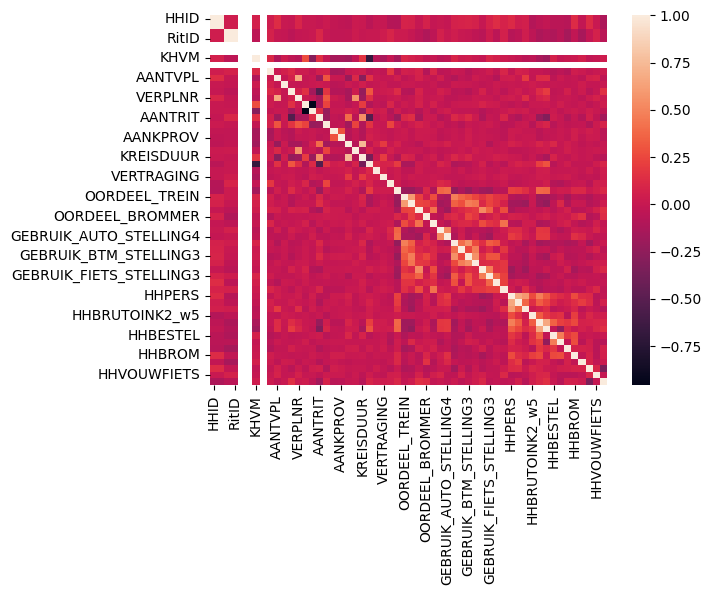

In [ ]:
fig = sns.heatmap(df.corr())